<center><h1>Boston Housing Missing Data Case Study</h1> </center>

<center><h2>Cho Kim, Jason Lin, Jonathan Marin</h2> </center>

<br/>

<center><h2>March 21, 2019</h2></center>

## 1 Introduction

For this case study, we are simulating missing data using the Boston Housing dataset from scikit-learn. We started by fitting a linear regressor to the data to establish a loss and goodness of fit baseline to compare later on in the case study. For step 2, we selected a specified percentage of our data within a single column and replaced the value with an imputed value. We compared our loss and goodness of fit baseline from the experiment to our baseline. We then evaluated a "Missing at Random" scenario by creating a control scenario for a third variable by making the 1st and 2nd variable randomly missing. We imputed different percentages of the missing data and compared the results. For the final scenario, we evaluated a "Missing not at Random" scenario where 25% of our data was missing for a single column. After imputing the missing data, we compared it to our loss and goodness of fit baseline.

# Step 1
Using Sklearn get the Boston Housing dataset.
Fit a linear regressor to the data as a baseline.  There is no need to do Cross-Validation.  We are exploring the change in results

What is the loss and what are the goodness of fit parameters?  This will be our baseline for comparison


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

%matplotlib inline
sns.set(style="white", font_scale=0.9)

boston = load_boston()

In [4]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [5]:
boston_df['target'] = boston.target

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

The following sections above shows the preliminary views of the Boston Housing Dataset. The document above shows the data dictionary for the different fields in the data set. There is also just a quick view of the different values for the different fields. There are 13 attributes in the dataset. 

In [8]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

Currently there are no missing attribute values in the dataset. 

In [9]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


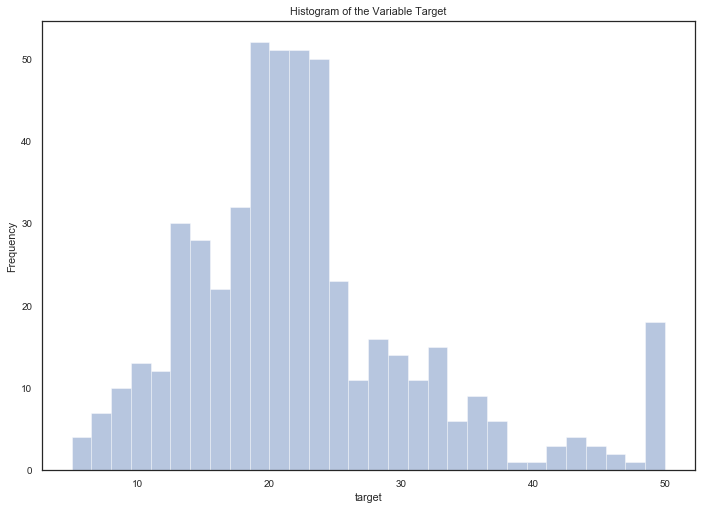

In [10]:
from matplotlib import pyplot
f1_dims = (11.7, 8.27)

fig, ax = pyplot.subplots(figsize=f1_dims)
dist = sns.distplot(boston_df['target'], bins = 30, kde = False)
plt.title('Histogram of the Variable Target')
plt.ylabel("Frequency")
plt.show()

The following shows the distribution of the "target" variable, and also a table of the summary statistics of the data set  

In [11]:
x = boston_df.drop(['target'], axis = 1)

y = boston_df['target']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .33, random_state = 1234)


In [13]:
results = pd.DataFrame(columns = ['Model', 'MSE', 'R2'])

In [14]:

lm = LinearRegression()

model = lm.fit(x_train,y_train)
y_pred_base = lm.predict(x_test)
mse = mean_squared_error(y_test, y_pred_base)
print("mse:", mse)
r2 = r2_score(y_test, y_pred_base)
print("r2:",r2)

base = "base"

results2 = pd.DataFrame([["base", mse, r2]],columns=['Model', 'MSE', 'R2'])

results = results.append(results2)


mse: 23.722599492382468
r2: 0.7370653779553855


The loss function that is being used as our baseline is the mean squared error, and the goodness of fit parameters is $R^2$. The baseline MSE is 23.72 and the baseline goodness of fit parameter ($R^2$) is 73.7%.

# Step 2 (repeated)
For select between 1, 5 10, 20, 33, and 50% of your data on a single column (Completely at random), replace the present value with a NAN and then perform an imputation of that value.   

In each case perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.


In [133]:
import random
random.choice(list(x_train.columns))

'PTRATIO'

The `PTRATIO` variable was randomly selected. The variable is pupil-teacher ratio by town. 

We examined the first few rows of our dataset.

In [13]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
37,0.08014,0.0,5.96,0.0,0.499,5.850,41.5,3.9342,5.0,279.0,19.2,396.90,8.77
215,0.19802,0.0,10.59,0.0,0.489,6.182,42.4,3.9454,4.0,277.0,18.6,393.63,9.47
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
299,0.05561,70.0,2.24,0.0,0.400,7.041,10.0,7.8278,5.0,358.0,14.8,371.58,4.74
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59


In [15]:
import numpy as np

In [16]:


weight_set = {.01, .05, .10, .20, .33,.50}

for i in weight_set:
    x_train.loc[x_train.sample(frac= i).index, 'PTRATIO'] = np.nan
    x_train = x_train.replace(np.nan, x_train['PTRATIO'].mean())
    model = lm.fit(x_train,y_train)
    y_pred_base = lm.predict(x_test)
    mse = mean_squared_error(y_test, y_pred_base)
    print("mse:", mse)
    r2 = r2_score(y_test, y_pred_base)
    print("r2:",r2)
    iteration = "Step2_" + str(i) + " Imputation"
    results2 = pd.DataFrame([[iteration, mse, r2]],columns=['Model', 'MSE', 'R2'])
    results = results.append(results2)
    
    
    

mse: 23.54214867356644
r2: 0.7390654440888744
mse: 23.083480395809946
r2: 0.7441491943032842
mse: 23.122986582494615
r2: 0.7437113188391011
mse: 22.83857600351386
r2: 0.7468636457210605
mse: 22.570198228529968
r2: 0.7498382695118986
mse: 22.57029493057389
r2: 0.7498371976936362


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
results.sort_values(by=['Model'])

,Model,MSE,R2
0,Step2_0.01 Imputation,22.570295,0.749837
0,Step2_0.05 Imputation,23.542149,0.739065
0,Step2_0.1 Imputation,23.083480,0.744149
0,Step2_0.2 Imputation,23.122987,0.743711
0,Step2_0.33 Imputation,22.838576,0.746864
0,Step2_0.5 Imputation,22.570198,0.749838
0,base,23.722599,0.737065


### 1%
The MSE was `23.49` for imputing 1% of the data within a single column. Our baseline MSE was `23.72`. Imputing 1% of the data, reduced the MSE. 

The $R^2$ was `73.97%` for imputing 1% of the data. Our baseline $R^2$ was `73.71%`. Imputing 1% of the data improved the goodness of fit marginally.

### 5%
The MSE was `23.69` for imputing 5% of the data. Our baseline MSE was `23.72`. Imputing 5% of the data decreased the MSE less than imputing 1% of the data.

The $R^2$ was `73.74%` for imputing 5% of the data. Our baseline $R^2$ was `73.71%`. Imputing 5% of the data improved the goodness of fit by `.03%` which is less than the improvement for imputing 1% of the data. 

### 10%
The MSE was `23.19` for imputing 10% of the data. Our baseline MSE was `23.72`. Imputing 10% of the data decreased the MSE around `.5`. 

The $R^2$ was `74.30%` for imputing 10% of the data. Our baseline $R^2$ was `73.71%`. Imputing 10% of the data improved the goodness of fit in comparison to the baseline. 

### 20%
The MSE was `22.70` for imputing 20% of the data. Our baseline MSE was `23.72`. Imputing 20% of the data decreased the MSE by `1` in comparison to the baseline.

The $R^2$ was `74.83%` for imputing 20% of the data. Our baseline $R^2$ was `73.71%`. Imputing 20% of the data improved the goodness of fit in comparison to the baseline. 

### 33%
The MSE was `22.67` for imputing 33% of the data. Our baseline MSE was `23.72`. Imputing 33% of the data improved the MSE in comparison to the baseline but marginally improved it from 20% by `.03`.

The $R^2$ was `74.87%` for imputing 33% of the data. Our baseline $R^2$ was `73.71%`. Imputing 33% of the data improved the goodness of fit compared to the baseline but marginally improved it from 20% by `.04%`.

### 50%
The MSE was `23.49` for imputing 50% of the data. Our baseline MSE was `23.72`. Imputing 50% of the data reduced the MSE compared to the baseline but did not improve the MSE compared to imputing 33% of the data. 

The $R^2$ was `73.97%` for imputing 50% of the data. Our baseline $R^2$ was `73.71%`.Imputing 50% of the data improved the goodness of fit in comparison to the baseline, but did not improve it from imputing 33% to 50%. 

Imputing 50% of the data resulted in identical MSE and $R^2$ values to imputing 1% of the data.

### Final Thoughts for Step 2
Comparing the different missing data quantities to the base case, we can see that the MSE and R-Square follow a parabolic pattern where in MSE there is a minimum and the R-Square there is a maximum. 

# Step 3
Take 2 different columns and create data “Missing at Random” when controlled for a third variable (i.e if Variable Z is > 30, then Variables X, Y are randomly missing).  Make runs with 10%, 20% and 30% missing data imputed via your best guess.  Repeat your fit and comparisons to the baseline.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .33, random_state = 1234)

Using the random module in Python, we selected 3 variables at random (RM, TAX, and LSTAT).

In [262]:
import random
random.choice(list(x_train.columns))

'RM'

In [27]:
import random
random.choice(list(x_train.columns))

'TAX'

In [31]:
import random
random.choice(list(x_train.columns))

'LSTAT'

| Variable | Description                              |
|----------|------------------------------------------|
| RM       | average number of rooms per dwelling     |
| TAX      | full-value property-tax rate per $10,000 |
| LSTAT    | lower status of the population           |

After examining a few values of the `LSTAT` variable (our variable Z), we decided the threshold for making the `RM` and `TAX` (variables X and Y) variables randomly missing is LSTST values greater than 10. 

In [19]:

x_train['LSTAT'].head()


37      8.77
215     9.47
323    11.74
299     4.74
494    13.59
Name: LSTAT, dtype: float64

In [20]:
weight_set = {.10,.20,.30}

for i in weight_set:

    change = x_train[x_train['LSTAT']> 10].sample(frac= i)
    change.RM = 9999
    change.TAX = 9999
    x_train.update(change)
    x_train.replace(9999,np.nan)
    x_train = x_train.replace(np.nan, x_train['RM'].mean())
    x_train = x_train.replace(np.nan, x_train['TAX'].mean())
    model = lm.fit(x_train,y_train)
    y_pred_base = lm.predict(x_test)
    mse = mean_squared_error(y_test, y_pred_base)
    print("mse:", mse)
    r2 = r2_score(y_test, y_pred_base)
    print("r2:",r2)
    iteration = "Step3_" + str(i) + " Imputation"
    results2 = pd.DataFrame([[iteration, mse, r2]],columns=['Model', 'MSE', 'R2'])
    results = results.append(results2)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:5082: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


mse: 30.457238965120197
r2: 0.6624205278014366
mse: 31.011439023521582
r2: 0.6562779301936296
mse: 31.02435413418321
r2: 0.6561347827387493


In [21]:
results.sort_values(by=['Model'])

,Model,MSE,R2
0,Step2_0.01 Imputation,22.570295,0.749837
0,Step2_0.05 Imputation,23.542149,0.739065
0,Step2_0.1 Imputation,23.083480,0.744149
0,Step2_0.2 Imputation,23.122987,0.743711
0,Step2_0.33 Imputation,22.838576,0.746864
0,Step2_0.5 Imputation,22.570198,0.749838
0,Step3_0.1 Imputation,30.457239,0.662421
0,Step3_0.2 Imputation,31.024354,0.656135
0,Step3_0.3 Imputation,31.011439,0.656278
0,base,23.722599,0.737065


### 10%
The MSE was `30.46` for imputing 10% of the data missing at random for Step 3. Our baseline MSE was `23.72`. Imputing 10% of the data for Step 3 increased the MSE significantly. 

The $R^2$ was `66.24%` for imputing 10% of the data. Our baseline $R^2$ was `73.71%`. Imputing 10% of the data did not improve the goodness of fit in comparison to the baseline. 

### 20%
The MSE was `31.02` for imputing 20% of the data missing at random for Step 3. Our baseline MSE was `23.72`. Imputing 20% of the data increased the MSE significantly in comparison to the baseline.

The $R^2$ was `65.61%` for imputing 20% of the data. Our baseline $R^2$ was `73.71%`. Imputing 20% of the data did not improve the goodness of fit in comparison to the baseline.

### 30%
The MSE was `31.01` for imputing 30% of the data. Our baseline MSE was `23.72`. Imputing 30% of the data did not improve the MSE in comparison to the baseline. 

### Final Thoughts for Step 3
The results above show the same parabolic pattern where MSE has a minimum and $R^2$ as a maximum. This seems to indicate that there could be a trade off with missing data, however, this would also depend on influential the variable is in predicting the target.

Overall Step 3 had worse metrics than the different percentages of missing data in Step 2. 


# Step 4
Create a Missing Not at Random pattern in which 25% of the data is missing for a single column.    Impute your data, fit the results and compare to a baseline.

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .33, random_state = 1234)

change = x_train[x_train['LSTAT']> 10].sample(frac= .25)
change.LSTAT = 9999
x_train.update(change)
x_train.replace(9999,np.nan)
x_train = x_train.replace(np.nan, x_train['LSTAT'].mean())

model = lm.fit(x_train,y_train)
y_pred_base = lm.predict(x_test)
mse = mean_squared_error(y_test, y_pred_base)
print("mse:", mse)
r2 = r2_score(y_test, y_pred_base)
print("r2:",r2)
iteration = "Step4_" + '0.25' + " Imputation"
results2 = pd.DataFrame([[iteration, mse, r2]],columns=['Model', 'MSE', 'R2'])
results = results.append(results2)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:5082: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


mse: 25.837527587300777
r2: 0.713624109663205


In [28]:
results.sort_values(by=['Model'])

,Model,MSE,R2
0,Step2_0.01 Imputation,22.570295,0.749837
0,Step2_0.05 Imputation,23.542149,0.739065
0,Step2_0.1 Imputation,23.083480,0.744149
0,Step2_0.2 Imputation,23.122987,0.743711
0,Step2_0.33 Imputation,22.838576,0.746864
0,Step2_0.5 Imputation,22.570198,0.749838
0,Step3_0.1 Imputation,30.457239,0.662421
0,Step3_0.2 Imputation,31.024354,0.656135
0,Step3_0.3 Imputation,31.011439,0.656278
0,Step4_.25 Imputation,25.763974,0.714439


When looking at the Missing Not at Random pattern at 25% of the data missing, shows MSE is high but not as high as step 3 method for missing data. The same pattern for the $R^2$.

## Results

In [31]:
results.sort_values(by=['R2'], ascending=[False])

,Model,MSE,R2
0,Step2_0.5 Imputation,22.570198,0.749838
0,Step2_0.01 Imputation,22.570295,0.749837
0,Step2_0.33 Imputation,22.838576,0.746864
0,Step2_0.1 Imputation,23.083480,0.744149
0,Step2_0.2 Imputation,23.122987,0.743711
0,Step2_0.05 Imputation,23.542149,0.739065
0,base,23.722599,0.737065
0,Step4_0.2 Imputation,25.500397,0.717361
0,Step4_.25 Imputation,25.763974,0.714439
0,Step4_0.25 Imputation,25.837528,0.713624


When sorting by $R^2$, the method in Step 2 gave us the best goodness of fit result that performed better than the baseline. Imputing 50% of the data in Step 2 gave us the highest goodness of fit result out of all of the runs. All of the runs in the Step 3 method had the lowest $R^2$ values out of all of the runs. 

In [33]:
results.sort_values(by=['MSE'])

,Model,MSE,R2
0,Step2_0.5 Imputation,22.570198,0.749838
0,Step2_0.01 Imputation,22.570295,0.749837
0,Step2_0.33 Imputation,22.838576,0.746864
0,Step2_0.1 Imputation,23.083480,0.744149
0,Step2_0.2 Imputation,23.122987,0.743711
0,Step2_0.05 Imputation,23.542149,0.739065
0,base,23.722599,0.737065
0,Step4_0.2 Imputation,25.500397,0.717361
0,Step4_.25 Imputation,25.763974,0.714439
0,Step4_0.25 Imputation,25.837528,0.713624


When sorting by MSE, the method in Step 2 gave us the lowest MSE in comparison to the baseline. Imputing 50% of the data in Step 2 resulted in the lowest MSE out of all of the different runs. All of the runs in the Step 3 method had the largest MSE value out of all of the runs. MSE and $R^2$ seem to be directly correlated since sorting by both MSE and $R^2$ yielded the same result. 